In [12]:
import pandas as pd
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.learning_curve import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score


import itertools
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

%matplotlib inline

In [2]:
df = pd.read_pickle('births_df0.pickle')

In [3]:
y = df['risky0']

In [4]:
X = (df[['dob_mm', 'dob_wk', 'bfacil3', 'mager14', 'mbstate_rec', 'restatus',
       'mbrace', 'mhisp_r', 'mar_p', 'dmar', 'meduc', 'fagerec11', 'fbrace',
       'fhisp_r', 'feduc', 'priordead', 'priorterm', 'lbo_rec', 'illb_r11',
       'precare5', 'previs_rec', 'wic', 'cig0_r', 'cig1_r', 'cig2_r', 'cig3_r',
       'm_ht_in', 'bmi_r', 'wtgain_rec', 'rf_pdiab', 'rf_gdiab', 'rf_phype',
       'rf_ghype', 'rf_ehype', 'rf_ppterm', 'rf_inftr', 'rf_fedrg', 'rf_artec',
       'rf_cesar', 'no_risks', 'ip_gon', 'ip_syph', 'ip_chlam', 'ip_hepatb',
       'ip_hepatc', 'no_infec', 'pay_rec', 'dplural', 'dlmp_yy', 'gestrec10']])

In [5]:
X_with_dummies= pd.get_dummies(X, columns=['dob_mm', 'dob_wk', 'bfacil3', 'mager14', 
                                             'mbstate_rec', 'restatus', 'mbrace', 'mhisp_r', 
                                             'mar_p', 'dmar', 'meduc', 'fagerec11', 'fbrace',
                                             'fhisp_r', 'feduc', 'priordead', 'priorterm', 
                                             'lbo_rec', 'illb_r11', 'precare5', 'previs_rec', 
                                             'wic', 'cig0_r', 'cig1_r', 'cig2_r', 'cig3_r',
                                             'm_ht_in', 'bmi_r', 'wtgain_rec', 'rf_pdiab', 
                                             'rf_gdiab', 'rf_phype','rf_ghype', 'rf_ehype', 
                                             'rf_ppterm', 'rf_inftr', 'rf_fedrg', 'rf_artec',
                                             'rf_cesar', 'no_risks', 'ip_gon', 'ip_syph', 
                                             'ip_chlam', 'ip_hepatb','ip_hepatc', 'no_infec', 
                                             'pay_rec', 'dplural', 'dlmp_yy', 'gestrec10'])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_with_dummies,y, test_size = .3, random_state = 42)

### Logistic Regression

In [7]:
lr = LogisticRegression(class_weight = {0:.1, 1:1})
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_score = (accuracy_score(y_test, lr_pred))
print('LogReg Accuracy: ' + str(lr_score))

LogReg Accuracy: 0.65814437958


In [8]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [9]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, lr.predict(X_test))
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[669121 359734]
 [ 40341 101108]]


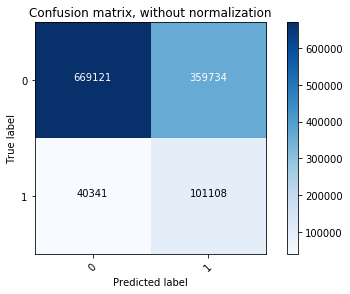

In [10]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')

Normalized confusion matrix
[[ 0.65  0.35]
 [ 0.29  0.71]]


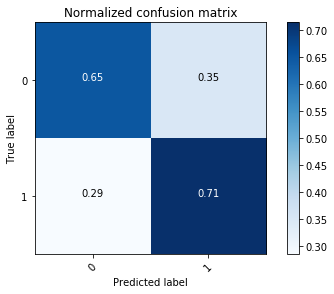

In [11]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], normalize=True,
                      title='Normalized confusion matrix')

### Naive Bayes

In [ ]:
naive_bayes = BernoulliNB()
naive_bayes.fit(X_train, y_train)
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None)

In [ ]:
df.groupby('risky0').count()